In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
gdp_df=pd.read_csv("../Notebooks/UNdata1.csv", nrows=6729)
energy_df=pd.read_csv("../Notebooks/UNdata3.csv", nrows=59493)

In [3]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country or Area          59493 non-null  object 
 1   Commodity - Transaction  59493 non-null  object 
 2   Year                     59492 non-null  float64
 3   Unit                     59492 non-null  object 
 4   Quantity                 59492 non-null  float64
 5   Quantity Footnotes       15204 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.7+ MB


In [4]:
#Cleaning up energy_df

#Drop uneaded columns
energy_df = energy_df.drop(labels = {'Quantity Footnotes', 'Unit', 'Commodity - Transaction'}, axis = 1)

#Add column of full Kw value
energy_df['Kw'] = energy_df['Quantity']*1000

#Rename Columns
energy_df = energy_df.rename(columns = {'Country or Area' : 'Country', 'Quantity' : 'Kw in Thousands'})

#Convert 'Country' to a string
energy_df = energy_df.astype({'Country':'string'})

energy_df.info()
print(energy_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          59493 non-null  string 
 1   Year             59492 non-null  float64
 2   Kw in Thousands  59492 non-null  float64
 3   Kw               59492 non-null  float64
dtypes: float64(3), string(1)
memory usage: 1.8 MB
       Country    Year  Kw in Thousands        Kw
0  Afghanistan  2017.0            519.0  519000.0
1  Afghanistan  2016.0            519.0  519000.0
2  Afghanistan  2015.0            519.0  519000.0
3  Afghanistan  2014.0            431.0  431000.0
4  Afghanistan  2013.0            431.0  431000.0


In [5]:
#Cleaning up gdp_df

#Drop uneaded columns
gdp_df = gdp_df.drop(labels='Value Footnotes', axis=1)

#Rename Columns
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value':'GDP_Per_Capita'})

#Convert 'Country' to a string
gdp_df = gdp_df.astype({'Country':'string'})
                                  
gdp_df.info()
print(gdp_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   string 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB
       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     1734.723214
1  Afghanistan  2017     1758.465636
2  Afghanistan  2016     1757.023490
3  Afghanistan  2015     1766.593077
4  Afghanistan  2014     1795.735834


In [6]:
#Creates true total Kw ignoring the various type of electricity in the original dataset

energy_df = energy_df.groupby(['Country', 'Year'], as_index=False)['Kw in Thousands', 'Kw'].sum()

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305 entries, 0 to 6304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          6305 non-null   object 
 1   Year             6305 non-null   float64
 2   Kw in Thousands  6305 non-null   float64
 3   Kw               6305 non-null   float64
dtypes: float64(3), object(1)
memory usage: 246.3+ KB


<ipython-input-6-6213f5a8ae47>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  energy_df = energy_df.groupby(['Country', 'Year'], as_index=False)['Kw in Thousands', 'Kw'].sum()


In [7]:
energy_gdp = energy_df.merge(gdp_df, on = ['Country', 'Year'])

energy_gdp.info()
print(energy_gdp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 0 to 4467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          4468 non-null   object 
 1   Year             4468 non-null   float64
 2   Kw in Thousands  4468 non-null   float64
 3   Kw               4468 non-null   float64
 4   GDP_Per_Capita   4468 non-null   float64
dtypes: float64(4), object(1)
memory usage: 209.4+ KB
          Country    Year  Kw in Thousands         Kw  GDP_Per_Capita
0     Afghanistan  2002.0           1964.0  1964000.0     1016.245409
1     Afghanistan  2003.0           1956.0  1956000.0     1055.557459
2     Afghanistan  2004.0           1956.0  1956000.0     1025.208245
3     Afghanistan  2005.0           1956.0  1956000.0     1099.104568
4     Afghanistan  2006.0           1956.0  1956000.0     1123.871323
...           ...     ...              ...        ...             ...
4463     Zimbabwe  2014.0   

In [8]:
energy_gdp.nunique()

Country             170
Year                 29
Kw in Thousands    3116
Kw                 3112
GDP_Per_Capita     4468
dtype: int64

In [9]:
#What is the correlation? Woah, that's pretty low! I wonder what countries have high and low 
#individual values? 

energy_gdp['Kw'].corr(energy_gdp['GDP_Per_Capita'])

0.14857634569026237

In [25]:
energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr().reset_index().sort_values('GDP_Per_Capita')

<ipython-input-25-7e7bb0a5bbd3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr().reset_index().sort_values('GDP_Per_Capita')


,Country,level_1,Kw,GDP_Per_Capita
322,United Arab Emirates,Kw,1.000000,-0.937264
176,Lithuania,Kw,1.000000,-0.907615
60,Cayman Islands,Kw,1.000000,-0.799472
280,South Sudan,Kw,1.000000,-0.774084
14,Aruba,Kw,1.000000,-0.758974
...,...,...,...,...
171,Lesotho,GDP_Per_Capita,-0.114587,1.000000
151,Jamaica,GDP_Per_Capita,0.318668,1.000000
339,Zimbabwe,GDP_Per_Capita,-0.227518,1.000000
82,Djibouti,Kw,NaN,NaN


In [29]:
temp1 = energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr()
temp1[temp1['GDP_Per_Capita']<1].reset_index().sort_values('GDP_Per_Capita', ascending = False).head(25)

<ipython-input-29-f8f9b3adff3d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp1 = energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr()


,Country,level_1,Kw,GDP_Per_Capita
33,China,Kw,1.0,0.997737
68,India,Kw,1.0,0.985821
154,Turkey,Kw,1.0,0.984771
72,Israel,Kw,1.0,0.983934
45,El Salvador,Kw,1.0,0.983921
60,Guatemala,Kw,1.0,0.980456
109,Nicaragua,Kw,1.0,0.979999
37,Costa Rica,Kw,1.0,0.979167
91,Malaysia,Kw,1.0,0.977949
65,Honduras,Kw,1.0,0.976030


In [11]:
energy_gdp_2000 = (energy_gdp[energy_gdp["Year"]==2000])

In [30]:
#energy_gdp_2000.sort_values('GDP_Per_Capita').head(25)
energy_gdp_2000.sort_values('GDP_Per_Capita')

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
1365,Ethiopia,2000.0,3342.8,3342800.0,621.159817
2750,Mozambique,2000.0,9472.0,9472000.0,633.458591
690,Burundi,2000.0,132.0,132000.0,717.973022
2957,Niger,2000.0,582.0,582000.0,754.855212
3418,Rwanda,2000.0,137.2,137200.0,801.747554
...,...,...,...,...,...
2217,Kuwait,2000.0,33860.0,33860000.0,70458.221419
820,Cayman Islands,2000.0,460.0,460000.0,78096.108036
2379,Luxembourg,2000.0,7068.0,7068000.0,81689.816338
4226,United Arab Emirates,2000.0,33120.0,33120000.0,103318.150198


In [31]:
#energy_gdp_2000.sort_values('GDP_Per_Capita', ascending = False).head(25)
energy_gdp_2000.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
3362,Qatar,2000.0,8992.0,8992000.0,108287.154078
4226,United Arab Emirates,2000.0,33120.0,33120000.0,103318.150198
2379,Luxembourg,2000.0,7068.0,7068000.0,81689.816338
820,Cayman Islands,2000.0,460.0,460000.0,78096.108036
2217,Kuwait,2000.0,33860.0,33860000.0,70458.221419
...,...,...,...,...,...
3418,Rwanda,2000.0,137.2,137200.0,801.747554
2957,Niger,2000.0,582.0,582000.0,754.855212
690,Burundi,2000.0,132.0,132000.0,717.973022
2750,Mozambique,2000.0,9472.0,9472000.0,633.458591


In [32]:
#energy_gdp_2000.sort_values('Kw').head(25)
energy_gdp_2000.sort_values('Kw')

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
4144,Tuvalu,2000.0,4.0,4.000000e+03,3051.833633
2176,Kiribati,2000.0,16.0,1.600000e+04,1989.430857
961,Comoros,2000.0,24.0,2.400000e+04,2388.511995
3999,Tonga,2000.0,36.0,3.600000e+04,4606.857862
4365,Vanuatu,2000.0,65.6,6.560000e+04,2824.305901
...,...,...,...,...,...
1869,India,2000.0,475800.0,4.758000e+08,2710.264072
1531,Germany,2000.0,485072.0,4.850720e+08,36698.843352
2065,Japan,2000.0,1090706.0,1.090706e+09,33871.858217
904,China,2000.0,1277320.0,1.277320e+09,3689.967255


In [33]:
#energy_gdp_2000.sort_values('Kw', ascending = False).head(25)
energy_gdp_2000.sort_values('Kw', ascending = False)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
4282,United States,2000.0,3277446.0,3.277446e+09,45661.268667
904,China,2000.0,1277320.0,1.277320e+09,3689.967255
2065,Japan,2000.0,1090706.0,1.090706e+09,33871.858217
1531,Germany,2000.0,485072.0,4.850720e+08,36698.843352
1869,India,2000.0,475800.0,4.758000e+08,2710.264072
...,...,...,...,...,...
4365,Vanuatu,2000.0,65.6,6.560000e+04,2824.305901
3999,Tonga,2000.0,36.0,3.600000e+04,4606.857862
961,Comoros,2000.0,24.0,2.400000e+04,2388.511995
2176,Kiribati,2000.0,16.0,1.600000e+04,1989.430857


In [34]:
energy_gdp_select = energy_gdp[energy_gdp['Country'].isin(
    ['China', 'United States', 'Zambia', 'Bangladesh'])]
                               
print(energy_gdp_select)

         Country    Year  Kw in Thousands          Kw  GDP_Per_Capita
322   Bangladesh  1990.0         10080.00  10080000.0     1325.592071
323   Bangladesh  1991.0         10760.00  10760000.0     1340.261660
324   Bangladesh  1992.0         10952.00  10952000.0     1382.000373
325   Bangladesh  1993.0         11792.00  11792000.0     1416.074705
326   Bangladesh  1994.0         11912.00  11912000.0     1440.012252
...          ...     ...              ...         ...             ...
4434      Zambia  2014.0          9808.00   9808000.0     3684.685507
4435      Zambia  2015.0          9644.24   9644240.0     3677.735019
4436      Zambia  2016.0         11307.64  11307640.0     3703.012866
4437      Zambia  2017.0         11587.64  11587640.0     3717.667166
4438      Zambia  2018.0         11592.92  11592920.0     3747.972455

[115 rows x 5 columns]


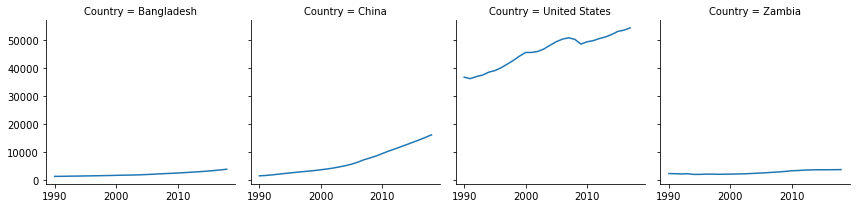

In [36]:
plottemp = sns.FacetGrid(energy_gdp_select, col = 'Country')
plottemp.map_dataframe(sns.lineplot, x = 'Year', y = 'GDP_Per_Capita')

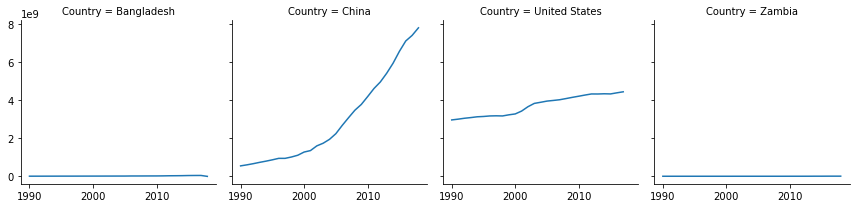

In [37]:
plottemp = sns.FacetGrid(energy_gdp_select, col = 'Country')
plottemp.map_dataframe(sns.lineplot, x = 'Year', y = 'Kw')

In [38]:
small = energy_gdp_select[energy_gdp_select['Country'].isin(['Zambia', 'Bangladesh'])]
large = energy_gdp_select[energy_gdp_select['Country'].isin(['China', 'United States'])]

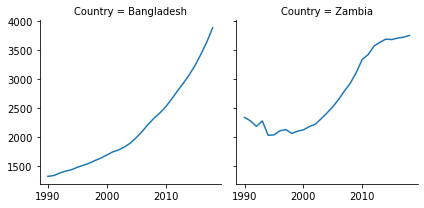

In [39]:
plottemp = sns.FacetGrid(small, col = 'Country')
plottemp.map_dataframe(sns.lineplot, x = 'Year', y = 'GDP_Per_Capita')

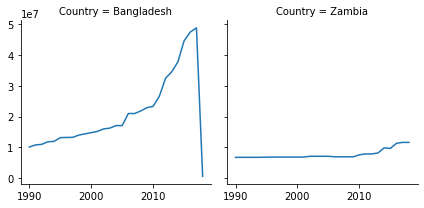

In [40]:
plottemp = sns.FacetGrid(small, col = 'Country')
plottemp.map_dataframe(sns.lineplot, x = 'Year', y = 'Kw')

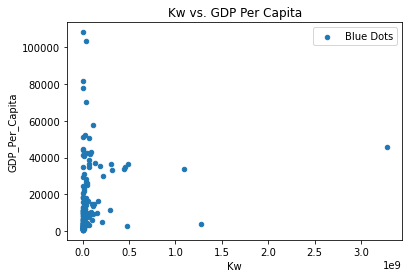

In [49]:
energy_gdp_2000.plot(
    x='Kw', 
    y='GDP_Per_Capita',
    kind='scatter',
    title='Kw vs. GDP Per Capita',
    label = 'Blue Dots')

In [46]:
energy_gdp_2000['Kw_Log'] = np.log(energy_gdp_2000['Kw'])

<ipython-input-46-4f0cbb7c0987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_gdp_2000['Kw_Log'] = np.log(energy_gdp_2000['Kw'])


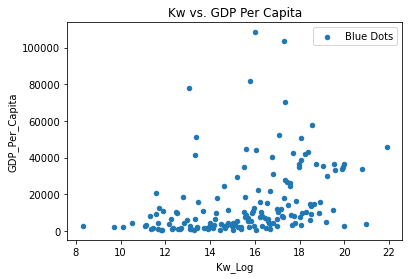

In [48]:
energy_gdp_2000.plot(
    x='Kw_Log', 
    y='GDP_Per_Capita',
    kind='scatter',
    title='Kw vs. GDP Per Capita',
    label = 'Blue Dots')

NameError: name 'z' is not defined

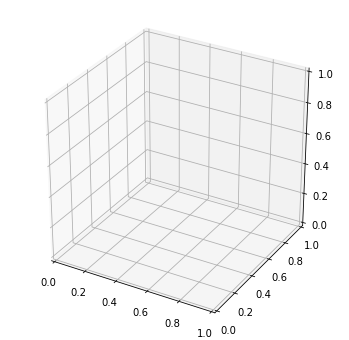

In [22]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

energy_gdp_select.groupby('Country').plot(
    x = 'Year',
    y = 'GDP_Per_Capita',
    z = 'Kw',
    kind = 'scatter',
    alpha=.7,
    edgecolor='k',
    s = 200,
    c=z)